**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
import shutil
import random
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools

**Building our Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

**Augmenting the Data**

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

**Initialization of the train generator**

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/WeedDetectorDataset/Train',
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'Crop': 0, 'Weed': 1}


**Initialization of the validation generator**

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/WeedDetectorDataset/Test',
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'binary'
)

Found 160 images belonging to 2 classes.


In [ ]:
print(validation_generator.class_indices)

{'Crop': 0, 'Weed': 1}


**Fitting the model**

In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 10,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 16s 1s/step - loss: 1.0665 - accuracy: 0.5235 - val_loss: 0.6932 - val_accuracy: 0.4766
Epoch 2/10
10/10 [==============================] - 11s 1s/step - loss: 0.6936 - accuracy: 0.4925 - val_loss: 0.6928 - val_accuracy: 0.4844
Epoch 3/10
10/10 [==============================] - 11s 1s/step - loss: 0.6901 - accuracy: 0.5223 - val_loss: 0.6926 - val_accuracy: 0.5859
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 0.6845 - accuracy: 0.5617 - val_loss: 0.6731 - val_accuracy: 0.9141
Epoch 5/10
10/10 [==============================] - 11s 1s/step - loss: 0.6349 - accuracy: 0.6443 - val_loss: 0.6053 - val_accuracy: 0.8594
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 0.5632 - accuracy: 0.7517 - val_loss: 0.3713 - val_accuracy: 0.8828
Epoch 7/10
10/10 [==============================] - 11s 1s/step - loss: 0.3867 - accuracy: 0.8286 - val_loss: 0.3646 - val_accuracy: 0.8906
Epoch 8/10
10/10 [==

In [ ]:
#model.get_weights()

**Saving the model**

In [ ]:
model.save("Detection_Weed.h5")

**Testing the model**

In [ ]:
model = load_model("Detection_Weed.h5")

In [ ]:
#Initializing the results lists in which our predictions will be stored (categorization)
y_actual = []
y_test = []

**Predicting results using the trained model for Validation against a Weed dataset**

In [ ]:
for i in os.listdir("/content/drive/MyDrive/WeedDetectorDataset/Test/Weed"):
  img = image.load_img("/content/drive/MyDrive/WeedDetectorDataset/Test/Weed/" +i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  #print(p)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


**Predicting results using the trained model for Validation against a Crop dataset**

In [ ]:
for i in os.listdir("/content/drive/MyDrive/WeedDetectorDataset/Test/Crop"):
  img = image.load_img("/content/drive/MyDrive/WeedDetectorDataset/Test/Crop/" +i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  #print(p)
  y_test.append(p[0,0])
  y_actual.append(0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#Transforming the results lists into arrays using numpy library
y_actual = np.array(y_actual)
y_test = np.array(y_test)

**Generating and Plotting the confusion matrix**

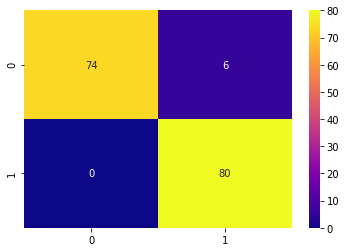

In [ ]:
cm = confusion_matrix(y_actual,y_test)
sns.heatmap(cm,cmap = "plasma" , annot=True)

In [ ]:
#Defining the function to plot the confusion matrix
class_names = ["Crop", "Weed"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Plotting the confusion matrix**

Confusion matrix, without normalization
[[74  6]
 [ 0 80]]


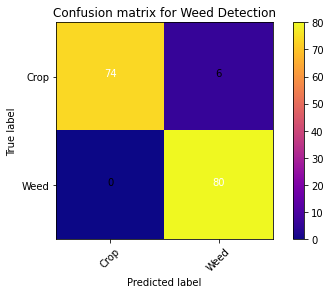

In [ ]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Weed Detection',cmap="plasma")

In [ ]:
history = hist
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Training and testing accuracy as a function of number of epochs**

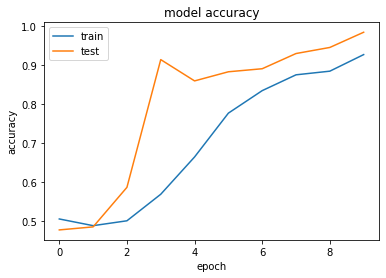

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Training and testing loss as a function of number of epochs**

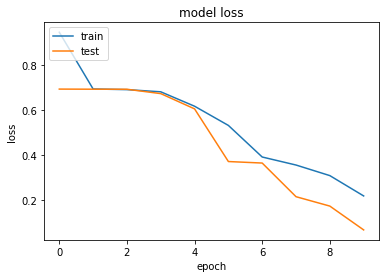

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


This image is crop image
Prediction Of Our Model :  Crop


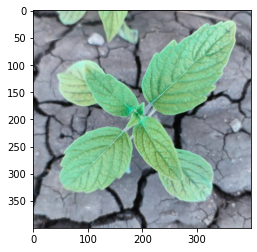

In [ ]:
#Testing on a unseen data for a Crop 
xtest_image = image.load_img('/content/drive/MyDrive/WeedDetectorDataset/Train/Crop.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
# training_set.class_indices

imggg = cv2.imread('/content/drive/MyDrive/WeedDetectorDataset/Train/Crop.jpeg')
print("This image is crop image")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
if results[0][0] == 0:
    prediction = 'Crop'
else:
    prediction = 'Weed'
print("Prediction Of Our Model : ",prediction)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


This image is weed image
Prediction Of Our Model :  Weed


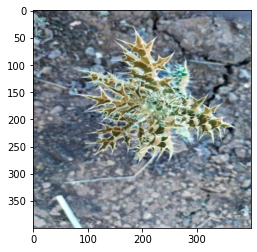

In [ ]:
#Testing on a unseen data for a Weed 
xtest_image = image.load_img('/content/drive/MyDrive/WeedDetectorDataset/Train/Weed.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
# training_set.class_indices

imggg = cv2.imread('/content/drive/MyDrive/WeedDetectorDataset/Train/Weed.jpeg')
print("This image is weed image")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
if results[0][0] == 0:
    prediction = 'Crop'
else:
    prediction = 'Weed'
print("Prediction Of Our Model : ",prediction)